**Gokul Nair**

 **2018120039**

Experiment 4    Date : 05-09-2020

### **Part D : Multiclass Logistic Classification**

Handwritten digits dataset - create confusion matrix

In [70]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
#Import Dataset
from sklearn.datasets import load_digits

In [72]:
#Load dataset
digits=load_digits()

In [73]:
# Keys in the dataset
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [74]:
digits.data[0:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [75]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [76]:
X=pd.DataFrame(digits.data)

In [77]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [78]:
X.columns

RangeIndex(start=0, stop=64, step=1)

<Figure size 432x288 with 0 Axes>

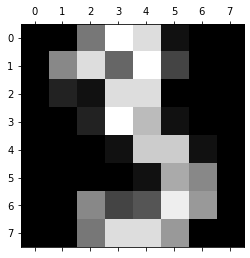

In [79]:
#8x8
plt.gray()
plt.matshow(digits.images[3])

In [80]:
X.shape

(1797, 64)

In [81]:
X[0:4]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0


In [82]:
X.describe

<bound method NDFrame.describe of        0    1     2     3     4     5   ...   58    59    60    61   62   63
0     0.0  0.0   5.0  13.0   9.0   1.0  ...  6.0  13.0  10.0   0.0  0.0  0.0
1     0.0  0.0   0.0  12.0  13.0   5.0  ...  0.0  11.0  16.0  10.0  0.0  0.0
2     0.0  0.0   0.0   4.0  15.0  12.0  ...  0.0   3.0  11.0  16.0  9.0  0.0
3     0.0  0.0   7.0  15.0  13.0   1.0  ...  7.0  13.0  13.0   9.0  0.0  0.0
4     0.0  0.0   0.0   1.0  11.0   0.0  ...  0.0   2.0  16.0   4.0  0.0  0.0
...   ...  ...   ...   ...   ...   ...  ...  ...   ...   ...   ...  ...  ...
1792  0.0  0.0   4.0  10.0  13.0   6.0  ...  2.0  14.0  15.0   9.0  0.0  0.0
1793  0.0  0.0   6.0  16.0  13.0  11.0  ...  6.0  16.0  14.0   6.0  0.0  0.0
1794  0.0  0.0   1.0  11.0  15.0   1.0  ...  2.0   9.0  13.0   6.0  0.0  0.0
1795  0.0  0.0   2.0  10.0   7.0   0.0  ...  5.0  12.0  16.0  12.0  0.0  0.0
1796  0.0  0.0  10.0  14.0   8.0   1.0  ...  8.0  12.0  14.0  12.0  1.0  0.0

[1797 rows x 64 columns]>

In [83]:
type(X)

pandas.core.frame.DataFrame

In [84]:
#multiclass logistic regression
# y = f(x) , x is multi-dimensional feature vector

In [85]:
y = pd.DataFrame(digits.target)

In [86]:
type(y)

pandas.core.frame.DataFrame

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [89]:
X_train.shape

(1437, 64)

In [90]:
X_test.shape

(360, 64)

In [91]:
y_train.shape

(1437, 1)

In [92]:
y_test.shape

(360, 1)

In [93]:
#BUILD LOGISTIC REG MODEL TO CLASSIFY IRIS SPECIES
from sklearn.linear_model import LogisticRegression

In [94]:
logMod=LogisticRegression()

In [95]:
%%time
logMod.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 311 ms, sys: 222 ms, total: 533 ms
Wall time: 302 ms


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
#Model Prediction
ypred=logMod.predict(X_test)

In [97]:
ypred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [98]:
logMod.score(X_test,ypred)

1.0

In [99]:
digits.target[41]

4

In [100]:
X_test[0:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
1081,0.0,0.0,11.0,16.0,15.0,3.0,0.0,0.0,0.0,5.0,16.0,12.0,11.0,13.0,0.0,0.0,0.0,3.0,13.0,1.0,5.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,7.0,0.0,0.0,0.0,0.0,0.0,10.0,15.0,0.0,0.0,0.0,0.0,0.0,12.0,16.0,16.0,11.0,1.0,0.0,0.0,0.0,13.0,13.0,8.0,13.0,16.0,8.0
1707,0.0,1.0,15.0,14.0,2.0,0.0,0.0,0.0,0.0,6.0,14.0,0.0,0.0,3.0,2.0,0.0,0.0,2.0,16.0,3.0,2.0,13.0,3.0,0.0,0.0,0.0,11.0,14.0,15.0,9.0,0.0,0.0,0.0,0.0,7.0,16.0,11.0,0.0,0.0,0.0,0.0,0.0,15.0,13.0,14.0,0.0,0.0,0.0,0.0,2.0,15.0,4.0,16.0,3.0,0.0,0.0,0.0,1.0,15.0,16.0,12.0,1.0,0.0,0.0
927,0.0,2.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,12.0,15.0,9.0,16.0,2.0,0.0,0.0,0.0,10.0,8.0,1.0,16.0,6.0,0.0,0.0,0.0,1.0,1.0,2.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,10.0,15.0,2.0,0.0,0.0,0.0,0.0,2.0,15.0,9.0,0.0,0.0,0.0,0.0,2.0,15.0,16.0,9.0,8.0,6.0,0.0,0.0,1.0,13.0,16.0,16.0,16.0,16.0,3.0
713,0.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,8.0,14.0,9.0,0.0,0.0,0.0,5.0,16.0,15.0,8.0,9.0,10.0,0.0,0.0,3.0,16.0,2.0,0.0,7.0,11.0,0.0,0.0,0.0,7.0,14.0,16.0,12.0,1.0,0.0
262,0.0,0.0,3.0,13.0,6.0,0.0,0.0,0.0,0.0,0.0,10.0,15.0,2.0,0.0,0.0,0.0,0.0,2.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,14.0,16.0,13.0,2.0,0.0,0.0,3.0,16.0,9.0,1.0,4.0,12.0,0.0,0.0,0.0,14.0,10.0,5.0,11.0,11.0,0.0,0.0,0.0,3.0,13.0,15.0,8.0,0.0,0.0


In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
confusion_matrix(y_test,y_pred=ypred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]])

In [103]:
from sklearn.metrics import classification_report,accuracy_score

In [104]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.92      0.94        37
           2       0.97      0.97      0.97        36
           3       1.00      0.97      0.98        30
           4       0.97      0.97      0.97        30
           5       0.93      0.97      0.95        38
           6       0.98      1.00      0.99        43
           7       0.97      0.97      0.97        39
           8       0.92      0.97      0.95        37
           9       0.98      0.93      0.95        43

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [105]:
accuracy_score(ypred,y_test)

0.9666666666666667

In [106]:
ypred[0]

2